In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
path = 'C:\\Users\\eswar\\intern_task\\animals'

# animal categories
categories = ['dogs', 'panda', 'cats']
    

Using TensorFlow backend.


In [2]:
pwd

'C:\\Users\\eswar\\intern_task\\animals'

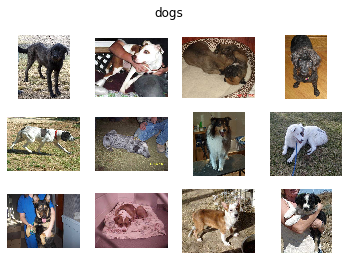

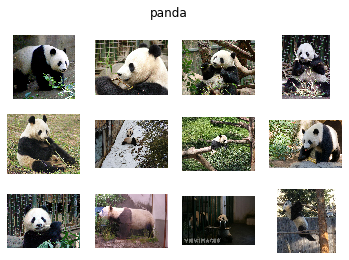

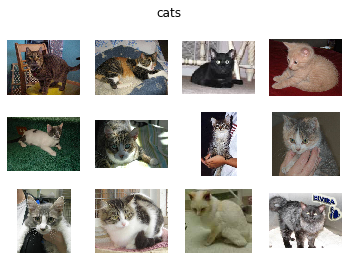

In [3]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+'\\'+category)[:12]):
        img = plt.imread(path+'\\'+category+'\\'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [4]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+'\\'+category):
        shape0.append(plt.imread(path+'\\'+category+'\\'+ files).shape[0])
        shape1.append(plt.imread(path+'\\'+category+'\\'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []


dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


In [5]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+'\\'+category):
        imagePaths.append([path+'\\'+category+'\\'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)



[['C:\\Users\\eswar\\intern_task\\animals\\dogs\\dogs_00655.jpg', 0], ['C:\\Users\\eswar\\intern_task\\animals\\dogs\\dogs_00834.jpg', 0], ['C:\\Users\\eswar\\intern_task\\animals\\panda\\panda_00970.jpg', 1], ['C:\\Users\\eswar\\intern_task\\animals\\cats\\cats_00376.jpg', 2], ['C:\\Users\\eswar\\intern_task\\animals\\cats\\cats_00304.jpg', 2], ['C:\\Users\\eswar\\intern_task\\animals\\dogs\\dogs_00030.jpg', 0], ['C:\\Users\\eswar\\intern_task\\animals\\cats\\cats_00642.jpg', 2], ['C:\\Users\\eswar\\intern_task\\animals\\panda\\panda_00275.jpg', 1], ['C:\\Users\\eswar\\intern_task\\animals\\panda\\panda_00735.jpg', 1], ['C:\\Users\\eswar\\intern_task\\animals\\panda\\panda_00178.jpg', 1]]


In [6]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

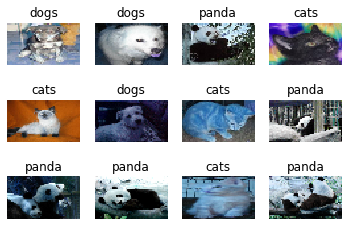

In [7]:
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [8]:
# partition the data into training and testing splits using 70% of
# the data for training and the remaining 30% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.3, random_state=42)

In [9]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2100, 32, 55, 3)
(900, 32, 55, 3)
(2100, 3)
(900,)


In [10]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 54, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 26, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 13, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 13, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2912)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)             

In [11]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)


Epoch 1/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.9020 - accuracy: 0.5400
Epoch 2/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.7678 - accuracy: 0.6124
Epoch 3/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.6887 - accuracy: 0.6652
Epoch 4/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.6563 - accuracy: 0.6757
Epoch 5/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.6287 - accuracy: 0.7081
Epoch 6/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.5797 - accuracy: 0.7329
Epoch 7/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.7500
Epoch 8/25
2100/2100 [==============================] - 4s 2ms/step - loss: 0.5343 - accuracy: 0.7590
Epoch 9/25
2100/2100 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.78 - 4s 2ms/step - loss: 0.4826 - accuracy: 0.7805
Epoch 10/25
2100/2100 [================

In [18]:
from numpy import argmax
from sklearn.metrics import accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) 

accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 74.78%


Prediction : cats


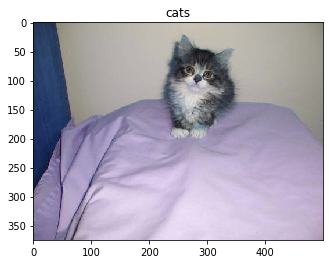

In [19]:
test_data=[]
test_image_o = cv2.imread(path+'\\'+'cats'+'\\'+'cats_00013.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
#fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : dogs


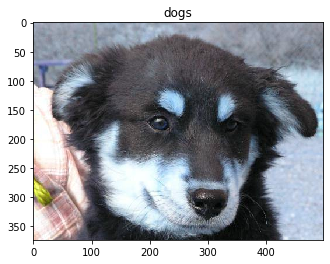

In [20]:
test_data=[]
test_image_o = cv2.imread(path+'\\'+'dogs'+'\\'+'dogs_00013.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : panda


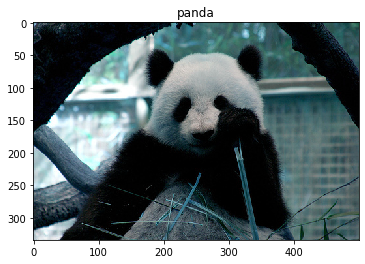

In [21]:
test_data=[]
test_image_o = cv2.imread(path+'\\'+'panda'+'\\'+'panda_00020.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : dogs


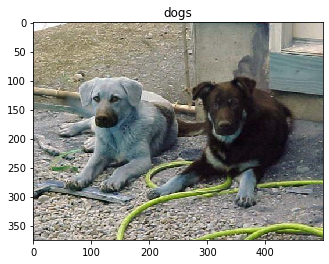

In [22]:
test_data=[]
test_image_o = cv2.imread(path+'\\'+'dogs'+'\\'+'dogs_00025.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : dogs


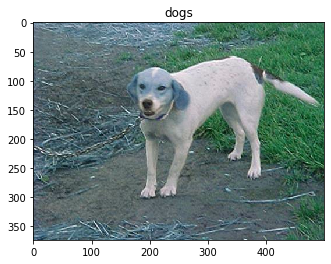

In [23]:
test_data=[]
test_image_o = cv2.imread(path+'\\'+'dogs'+'\\'+'dogs_00125.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)